In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score
from sklearn import set_config

# Output dataframes instead of arrays
set_config(transform_output="pandas")

In [4]:
sacramento = pd.read_csv("dataset/sacramento.csv")
sacramento

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,1005 MORENO WAY,SACRAMENTO,95838,CA,3,2,1410,Residential,Fri May 16 00:00:00 EDT 2008,180000,38.646206,-121.442767
1,10105 MONTE VALLO CT,SACRAMENTO,95827,CA,4,2,1578,Residential,Fri May 16 00:00:00 EDT 2008,190000,38.573917,-121.316916
2,10133 NEBBIOLO CT,ELK GROVE,95624,CA,4,3,2096,Residential,Fri May 16 00:00:00 EDT 2008,289000,38.391085,-121.347231
3,10165 LOFTON WAY,ELK GROVE,95757,CA,3,2,1540,Residential,Fri May 16 00:00:00 EDT 2008,266510,38.387708,-121.436522
4,10254 JULIANA WAY,SACRAMENTO,95827,CA,4,2,2484,Residential,Fri May 16 00:00:00 EDT 2008,331200,38.568030,-121.309966
...,...,...,...,...,...,...,...,...,...,...,...,...
808,9507 SEA CLIFF WAY,ELK GROVE,95758,CA,4,2,2056,Residential,Wed May 21 00:00:00 EDT 2008,285000,38.410992,-121.479043
809,9570 HARVEST ROSE WAY,SACRAMENTO,95827,CA,5,3,2367,Residential,Wed May 21 00:00:00 EDT 2008,315537,38.555993,-121.340352
810,9723 TERRAPIN CT,ELK GROVE,95757,CA,4,3,2354,Residential,Wed May 21 00:00:00 EDT 2008,335750,38.403492,-121.430224
811,9837 CORTE DORADO CT,ELK GROVE,95624,CA,4,2,1616,Residential,Wed May 21 00:00:00 EDT 2008,227887,38.400676,-121.381010


In [5]:
#split the data into train and test

sacramento_train, sacramento_test = train_test_split(sacramento, train_size=0.75, random_state=123)

In [6]:
#step 1. define our predictor and response variables
X_train = sacramento[["sq__ft"]]
y_train = sacramento["price"]

In [7]:
X_train

,sq__ft
0,1410
1,1578
2,2096
3,1540
4,2484
...,...
808,2056
809,2367
810,2354
811,1616


In [8]:
y_train

0      180000
1      190000
2      289000
3      266510
4      331200
        ...  
808    285000
809    315537
810    335750
811    227887
812    131200
Name: price, Length: 813, dtype: int64

In [9]:
#step 2. initialize a linear regression
lm = LinearRegression()

In [10]:
#step 3. Fit model to our data using the fit method
lm.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [11]:
lm.coef_        #slope of the line; b1. Means the price of house increase by 134.6 for every sq.ft

array([134.64083994])

In [12]:
lm.intercept_   #intercept of the line; b0

np.float64(16195.545596351672)

In [13]:
# y = 139.6(x) + 16195

In [14]:
#make predictions on the test set
sacramento_test["predicted"] = lm.predict(sacramento_test[["sq__ft"]])

In [15]:
#calculate RMSPE
mean_squared_error(
    y_true=sacramento_test["price"],
    y_pred=sacramento_test["predicted"]
)**(1/2)

84669.5499485594

In [16]:
#calculate r2
r2_score(
    y_true=sacramento_test["price"],
    y_pred=sacramento_test["predicted"]
)

0.5095174174637644

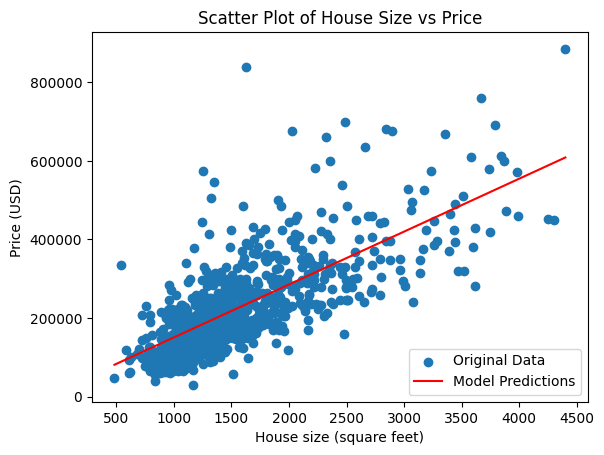

In [17]:
# This line calculates the minimum and maximum values of the "sq__ft" column in the sacramento dataset.
sqft_prediction_grid = sacramento[["sq__ft"]].agg(["min", "max"])

# Uses the linear model to predict prices for the min and max square footage values.
sqft_prediction_grid["predicted"] = lm.predict(sqft_prediction_grid)

# Plot the original data
plt.scatter(sacramento["sq__ft"], sacramento["price"], label='Original Data')

# Plot the model predictions as a line
plt.plot(sqft_prediction_grid["sq__ft"], sqft_prediction_grid["predicted"], color='red', label='Model Predictions')

# Add labels and legend
plt.xlabel('House size (square feet)')
plt.ylabel('Price (USD)')
plt.title('Scatter Plot of House Size vs Price')
plt.legend()

# Show the plot
plt.show()

In [18]:
returned_dictionary = cross_validate(
    estimator=lm,
    cv=5,
    X=sacramento[["sq__ft"]],
    y=sacramento["price"],
    scoring="neg_root_mean_squared_error" #r2
)

In [19]:
cv_5_df = pd.DataFrame(returned_dictionary)
cv_5_df

,fit_time,score_time,test_score
0,0.001415,0.002023,-81369.919847
1,0.002997,0.001004,-97590.236340
2,0.000999,0.001005,-61790.733828
3,0.000997,0.000993,-92026.283010
4,0.001002,0.001076,-75474.947490


In [20]:
cv_5_df["test_score"] = cv_5_df["test_score"].abs()
cv_5_df

,fit_time,score_time,test_score
0,0.001415,0.002023,81369.919847
1,0.002997,0.001004,97590.236340
2,0.000999,0.001005,61790.733828
3,0.000997,0.000993,92026.283010
4,0.001002,0.001076,75474.947490


In [21]:
cv_5_df.agg(["mean","sem"])

,fit_time,score_time,test_score
mean,0.001482,0.001220,81650.424103
sem,0.000387,0.000201,6302.216095


In [29]:
#multivariable linear regression using both sq__ft and no. of bedrooms

mlm=LinearRegression()

returned_dictionary_2 = cross_validate(
    estimator=mlm,
    cv=5,
    X=sacramento[["sq__ft","beds"]],
    y=sacramento["price"],
    scoring="r2"
)

In [30]:
cv_5_df_mlm = pd.DataFrame(returned_dictionary_2)
cv_5_df_mlm.agg(["mean","sem"])

,fit_time,score_time,test_score
mean,0.001709,0.001625,0.51978
sem,0.000312,0.000246,0.02097


In [24]:
mlm.fit(sacramento[["sq__ft","beds"]],sacramento["price"])

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [25]:
mlm.coef_

array([   156.23291179, -22894.49430778])

In [27]:
mlm.intercept_

np.float64(56239.192229688924)